In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# from google.colab.patches import
from skimage.feature import match_template
import os
from skimage.feature import peak_local_max


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [50]:
def sharpen_image(img_bgr,  sharpen_filter=np.array([[-1,-1,-1],
                                                     [-1,3,-1],
                                                     [-1,-1,-1]])):
  #sharpening the image
  plt.figure(figsize= (12,16))
  img_bgr=cv2.filter2D(img_bgr,-1,sharpen_filter)
  plt.subplot(1,3,1)
  plt.imshow(cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB))
  plt.title("RGB image")
  cv2.imwrite("sample.jpg",img_bgr)

  #extract blue channel only
  blue=img_bgr[:,:,2]
  plt.subplot(1,3,2)
  plt.imshow(blue,cmap= 'gray')
  plt.title("B image")

  #increase contrast by hist equalization
  equ=cv2.equalizeHist(blue)
  plt.subplot(1,3,3)
  plt.imshow(equ,cmap='gray')
  plt.title("equ image")
  plt.tight_layout()
#   plt.axes("off")
  inverted_equ=cv2.bitwise_not(equ)
  # sharpen_filter2=np.array([[-1,-1,-1,-1,-1],
  #                         [-1,+1,+1,1,-1],
  #                         [-1,1,2,1,-1],
  #                         [-1,1,2,1,-1],
  #                         [-1,1,2,1,-1]])
  # filter_final=cv2.filter2D(inverted_equ,-1,sharpen_filter2)
  #plt.imshow(filter_final)

  return inverted_equ

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

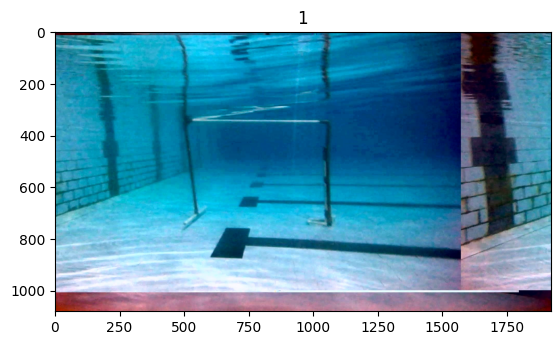

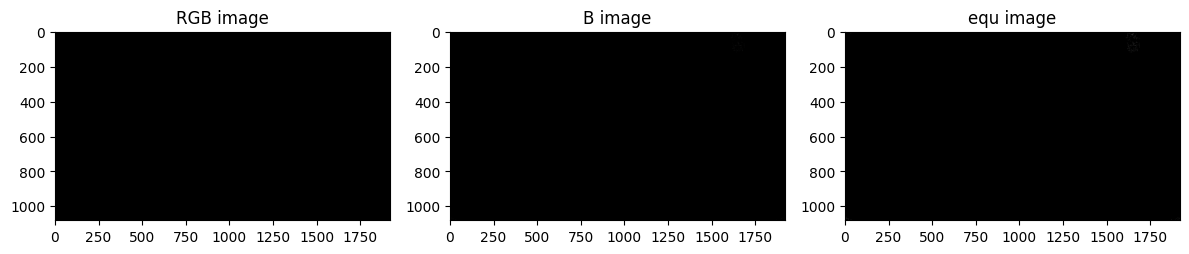

In [40]:
c=0
images = []
# dir ='/content/drive/MyDrive/OutputImages_01'  #put folder with images
dir = 'OutputImages_01'  #put folder with images
for img_name in os.listdir(dir):
  plt.figure()
  c=c+1
  #create image path
  path=os.path.join(dir,img_name)
  img=cv2.imread(path)
  #make rgb from bgr
  img_bgr=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(img_bgr)
  plt.title(f'{c}')

  inverted_equ = sharpen_image(img_bgr)
  print(inverted_equ.mean())
  height, width = inverted_equ.shape
 #The following piece of code iterates over each pixel and deletes area around the pixel
 #if the sum of intensitites is above a certain threshold given by nsize*nsize*desired intnesity
# Iterate over x, y coordinates
  for y in range(height):
    for x in range(width):
      #cv2.circle(edge2,(x,y),10,255,-1)
      neighborhood_size = 110
      half_size = neighborhood_size // 2
      neighborhood_x = slice(max(0, x - half_size), min(inverted_equ.shape[1], x + half_size + 1))
      neighborhood_y = slice(max(0, y - half_size), min(inverted_equ.shape[0], y + half_size + 1))
      # Set the values in the neighborhood to 0
      if(inverted_equ[neighborhood_y, neighborhood_x]).sum() >= neighborhood_size*neighborhood_size *160 :
        inverted_equ[neighborhood_y, neighborhood_x]=0
  images.append(inverted_equ)
  plt.imshow(inverted_equ)
  plt.show()

In [ ]:
len(images)

11

In [ ]:
for img_name,img in zip(os.listdir(dir),images):
    dir = "OutputImages_02/"+img_name
    cv2.imwrite(dir,img)

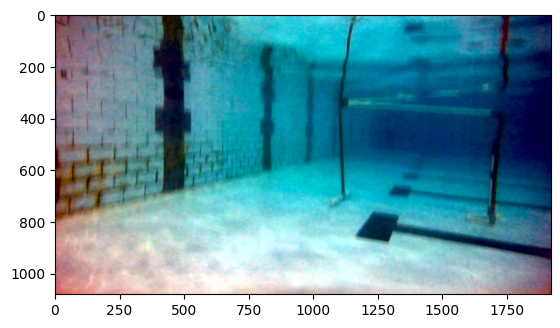

In [51]:
img_name = "WIN_20231017_23_20_12_Pro - frame at 1m4s_RGHS.jpg"
#create image path
dir = "OutputImages_01/"
path = dir+img_name
img = cv2.imread(path)
#make rgb from bgr
img_bgr=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_bgr)

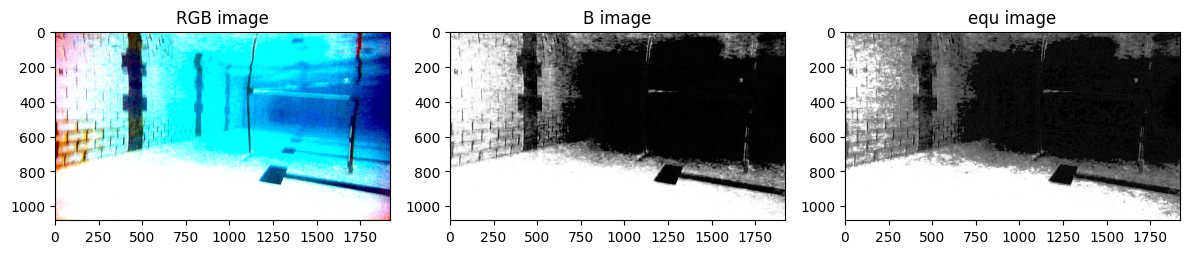

In [52]:
kernel = np.array([
    [-1, -1, -1, -1],
    [-1, 3.5, 3.5, -1],
    [-1, 3.5, 3.5, -1],
    [-1, -1, -1, -1]
])
sharp = sharpen_image(img,  sharpen_filter = kernel)

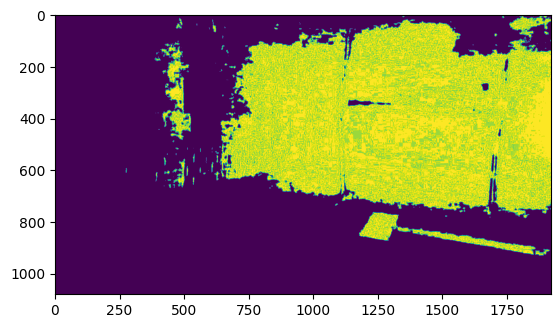

In [33]:
plt.imshow(sharp)